# NBA Ratings EDA & Neural Network Model

In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf
import os
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
dfNBA = pd.read_csv('Resources/nba_rankings_2014-2020.csv')

In [3]:
dfNBA.head()

,Unnamed: 0,PLAYER,TEAM,AGE,SEASON,GP,W,L,MIN,PTS,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,rankings
0,0,Aaron Gordon,ORL,24,2019-20,62,30,32,32.5,14.4,...,3.7,1.6,0.8,0.6,2.0,31.9,20.0,1.0,-1.1,80.0
1,1,Aaron Holiday,IND,23,2019-20,66,42,24,24.5,9.5,...,3.4,1.3,0.8,0.2,1.8,19.3,3.0,0.0,1.7,76.0
2,2,Abdel Nader,OKC,26,2019-20,55,37,18,15.8,6.3,...,0.7,0.8,0.4,0.4,1.4,11.1,0.0,0.0,-1.5,71.0
3,3,Adam Mokoka,CHI,21,2019-20,11,3,8,10.2,2.9,...,0.4,0.2,0.4,0.0,1.5,5.5,0.0,0.0,4.5,68.0
4,4,Admiral Schofield,WAS,23,2019-20,33,9,24,11.2,3.0,...,0.5,0.2,0.2,0.1,1.5,6.3,0.0,0.0,-1.7,71.0


In [4]:
dfNBA.shape

(2412, 32)

In [5]:
dfNBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2412 entries, 0 to 2411
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2412 non-null   int64  
 1   PLAYER      2412 non-null   object 
 2   TEAM        2412 non-null   object 
 3   AGE         2412 non-null   int64  
 4   SEASON      2412 non-null   object 
 5   GP          2412 non-null   int64  
 6   W           2412 non-null   int64  
 7   L           2412 non-null   int64  
 8   MIN         2412 non-null   float64
 9   PTS         2412 non-null   float64
 10  FGM         2412 non-null   float64
 11  FGA         2412 non-null   float64
 12  FG%         2412 non-null   float64
 13  3PM         2412 non-null   float64
 14  3PA         2412 non-null   float64
 15  3P%         2412 non-null   float64
 16  FTM         2412 non-null   float64
 17  FTA         2412 non-null   float64
 18  FT%         2412 non-null   float64
 19  OREB        2412 non-null  

In [6]:
duplicate_rows_df = dfNBA[dfNBA.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape )

number of duplicate rows:  (0, 32)


In [7]:
dfNBA.describe()

,Unnamed: 0,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,rankings
count,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,...,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000
mean,339.196103,26.314677,55.381012,27.982172,27.398839,21.516086,9.445149,3.502239,7.693615,45.132546,...,2.040547,1.226658,0.689096,0.442786,1.839096,19.423839,5.009121,0.236318,-0.114594,75.656716
std,200.470761,4.148336,22.816590,15.299014,13.728032,8.762708,6.028712,2.161709,4.574182,8.848778,...,1.825906,0.812183,0.422630,0.437123,0.723557,10.780126,10.114069,1.708944,3.004522,5.797701
min,0.000000,19.000000,1.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18.000000,62.000000
25%,170.000000,23.000000,40.000000,16.000000,17.000000,14.900000,5.000000,1.900000,4.200000,40.875000,...,0.800000,0.700000,0.400000,0.200000,1.400000,11.600000,0.000000,0.000000,-1.900000,72.000000
50%,336.500000,26.000000,62.000000,28.000000,28.000000,21.500000,8.000000,3.000000,6.700000,44.500000,...,1.500000,1.000000,0.600000,0.300000,1.900000,17.500000,1.000000,0.000000,-0.200000,75.000000
75%,509.250000,29.000000,74.000000,40.000000,37.000000,28.900000,12.800000,4.800000,10.600000,49.000000,...,2.600000,1.600000,0.900000,0.600000,2.300000,25.700000,5.000000,0.000000,1.500000,78.000000
max,795.000000,41.000000,83.000000,73.000000,68.000000,38.700000,36.100000,10.900000,24.500000,100.000000,...,11.700000,5.700000,2.400000,3.700000,5.000000,60.600000,69.000000,42.000000,13.200000,98.000000


In [9]:
dfNBA.isna().sum()

Unnamed: 0    0
PLAYER        0
TEAM          0
AGE           0
SEASON        0
GP            0
W             0
L             0
MIN           0
PTS           0
FGM           0
FGA           0
FG%           0
3PM           0
3PA           0
3P%           0
FTM           0
FTA           0
FT%           0
OREB          0
DREB          0
REB           0
AST           0
TOV           0
STL           0
BLK           0
PF            0
FP            0
DD2           0
TD3           0
+/-           0
rankings      0
dtype: int64

In [10]:
dfNBA.head()

,Unnamed: 0,PLAYER,TEAM,AGE,SEASON,GP,W,L,MIN,PTS,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,rankings
0,0,Aaron Gordon,ORL,24,2019-20,62,30,32,32.5,14.4,...,3.7,1.6,0.8,0.6,2.0,31.9,20.0,1.0,-1.1,80.0
1,1,Aaron Holiday,IND,23,2019-20,66,42,24,24.5,9.5,...,3.4,1.3,0.8,0.2,1.8,19.3,3.0,0.0,1.7,76.0
2,2,Abdel Nader,OKC,26,2019-20,55,37,18,15.8,6.3,...,0.7,0.8,0.4,0.4,1.4,11.1,0.0,0.0,-1.5,71.0
3,3,Adam Mokoka,CHI,21,2019-20,11,3,8,10.2,2.9,...,0.4,0.2,0.4,0.0,1.5,5.5,0.0,0.0,4.5,68.0
4,4,Admiral Schofield,WAS,23,2019-20,33,9,24,11.2,3.0,...,0.5,0.2,0.2,0.1,1.5,6.3,0.0,0.0,-1.7,71.0


In [11]:
dfNBAtrain = dfNBA[(dfNBA.SEASON != '2019-20')]
dfNBAtest = dfNBA[(dfNBA.SEASON == '2019-20')]

In [12]:
dfNBAtrain.shape

(1905, 32)

In [13]:
dfNBAtest.shape

(507, 32)

In [14]:
train_dataset_all = dfNBAtrain.sample(frac=0.8, random_state=0)
test_dataset_all = dfNBAtest.copy()


In [17]:
df_20192020_all

,Unnamed: 0,PLAYER,TEAM,AGE,SEASON,GP,W,L,MIN,PTS,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,rankings
0,0,Aaron Gordon,ORL,24,2019-20,62,30,32,32.5,14.4,...,3.7,1.6,0.8,0.6,2.0,31.9,20.0,1.0,-1.1,80.0
1,1,Aaron Holiday,IND,23,2019-20,66,42,24,24.5,9.5,...,3.4,1.3,0.8,0.2,1.8,19.3,3.0,0.0,1.7,76.0
2,2,Abdel Nader,OKC,26,2019-20,55,37,18,15.8,6.3,...,0.7,0.8,0.4,0.4,1.4,11.1,0.0,0.0,-1.5,71.0
3,3,Adam Mokoka,CHI,21,2019-20,11,3,8,10.2,2.9,...,0.4,0.2,0.4,0.0,1.5,5.5,0.0,0.0,4.5,68.0
4,4,Admiral Schofield,WAS,23,2019-20,33,9,24,11.2,3.0,...,0.5,0.2,0.2,0.1,1.5,6.3,0.0,0.0,-1.7,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,623,Zach LaVine,CHI,25,2019-20,60,20,40,34.8,25.5,...,4.2,3.4,1.5,0.5,2.2,40.0,2.0,0.0,-3.2,85.0
503,624,Zach Norvell Jr.,GSW,22,2019-20,5,2,3,8.2,2.0,...,0.6,0.6,0.4,0.0,0.8,4.9,0.0,0.0,-5.4,68.0
504,628,Zhaire Smith,PHI,21,2019-20,7,3,4,4.6,1.1,...,0.3,0.3,0.4,0.0,0.6,2.9,0.0,0.0,-1.4,70.0
505,629,Zion Williamson,NOP,19,2019-20,24,11,13,27.8,22.5,...,2.1,2.5,0.7,0.4,1.8,33.8,2.0,0.0,2.6,86.0


In [18]:
# Drop the non-beneficial ID columns
train_dataset = train_dataset_all.drop(columns=["PLAYER", "TEAM", "SEASON", "Unnamed: 0"], axis=1)
test_dataset = test_dataset_all.drop(columns=["PLAYER", "TEAM", "SEASON", "Unnamed: 0"], axis=1)


In [22]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()


train_labels = train_features.pop('rankings')
test_labels = test_features.pop('rankings')


In [23]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
AGE,26.459318,4.151472
GP,58.973753,21.350112
W,29.842520,14.908348
L,29.131234,13.533833
MIN,22.046194,8.516270
PTS,9.582612,5.817381
FGM,3.557415,2.083870
FGA,7.829856,4.447595
FG%,45.236811,8.348555
3PM,0.870997,0.776433


In [24]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [25]:
normalizer.adapt(np.array(train_features))

In [26]:
minutes = np.array(train_features['MIN'])
minutes_normalizer = layers.Normalization(input_shape=[1,], axis=None)
minutes_normalizer.adapt(minutes)

In [27]:
minutes_model = tf.keras.Sequential([
    minutes_normalizer,
    layers.Dense(units=1)
])

minutes_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [28]:
minutes_model.predict(minutes[:10])

array([[ 0.54528767],
       [-1.0345956 ],
       [ 0.721985  ],
       [ 0.52449965],
       [-0.67080677],
       [ 0.2438624 ],
       [-0.37977573],
       [ 0.08795287],
       [-1.2112932 ],
       [ 0.2646504 ]], dtype=float32)

In [29]:
minutes_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [30]:
%%time
history = minutes_model.fit(
    train_features['MIN'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 4.12 s


In [31]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,2.675311,2.627438,95
96,2.682789,2.648964,96
97,2.670376,2.657358,97
98,2.675577,2.642264,98
99,2.670216,2.644281,99


In [32]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Rating]')
  plt.legend()
  plt.grid(True)

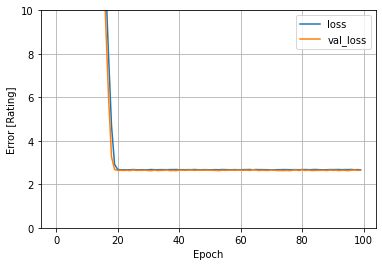

In [33]:
plot_loss(history)

In [34]:
test_results = {}

test_results['minutes_model'] = minutes_model.evaluate(
    test_features['MIN'],
    test_labels, verbose=0)

In [35]:
x = tf.linspace(0.0, 250, 251)
y = minutes_model.predict(x)

In [36]:
def plot_Minutes(x, y):
  plt.scatter(train_features['MIN'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Min')
  plt.ylabel('Rating')
  plt.legend()

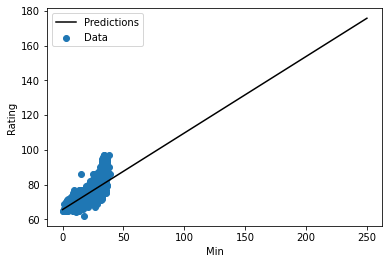

In [37]:
plot_Minutes(x, y)

In [38]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [39]:
linear_model.predict(train_features[:10])

array([[ 2.052553  ],
       [ 1.2622612 ],
       [-0.08414521],
       [ 1.0198692 ],
       [-1.7758443 ],
       [ 2.0606909 ],
       [ 0.0805077 ],
       [ 0.20469737],
       [-0.56537825],
       [ 0.2110427 ]], dtype=float32)

In [40]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(27, 1) dtype=float32, numpy=
array([[-0.00219893],
       [-0.04554898],
       [-0.22256744],
       [-0.43640733],
       [-0.3716159 ],
       [-0.17268816],
       [ 0.15012294],
       [-0.16675672],
       [-0.33580488],
       [ 0.10379845],
       [-0.15376174],
       [-0.23275824],
       [-0.31379342],
       [-0.29339418],
       [ 0.08937734],
       [ 0.00637057],
       [-0.45713755],
       [ 0.34774023],
       [ 0.36666554],
       [ 0.45895422],
       [ 0.05300587],
       [ 0.16506416],
       [-0.31530905],
       [ 0.02866468],
       [ 0.05614978],
       [-0.02021074],
       [ 0.2779069 ]], dtype=float32)>

In [41]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [42]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 4.09 s


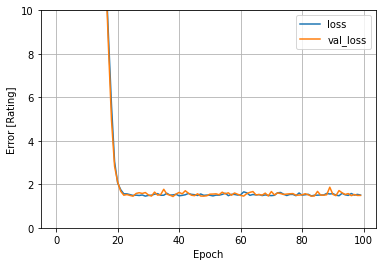

In [43]:
plot_loss(history)

In [44]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [45]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [46]:
dnn_min_model = build_and_compile_model(minutes_normalizer)

In [47]:
dnn_min_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [48]:
%%time
history = dnn_min_model.fit(
    train_features['MIN'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

Wall time: 4.3 s


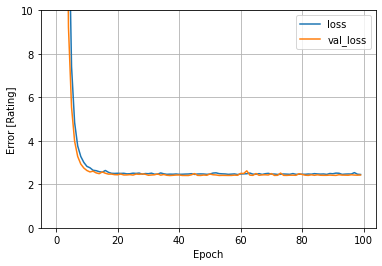

In [49]:
plot_loss(history)

In [50]:
x = tf.linspace(0.0, 250, 251)
y = dnn_min_model.predict(x)

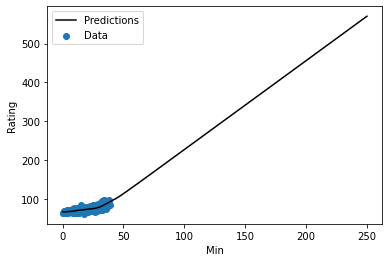

In [51]:
plot_Minutes(x, y)

In [52]:
test_results['dnn_min_model'] = dnn_min_model.evaluate(
    test_features['MIN'], test_labels,
    verbose=0)

In [53]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 27)               55        
 n)                                                              
                                                                 
 dense_5 (Dense)             (None, 64)                1792      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,072
Trainable params: 6,017
Non-trainable params: 55
_________________________________________________________________


In [54]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

Wall time: 4.25 s


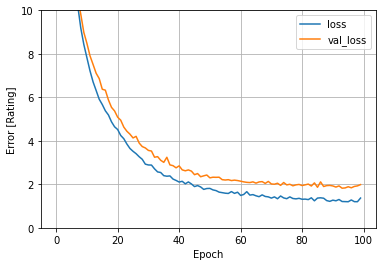

In [55]:
plot_loss(history)

In [56]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [57]:
pd.DataFrame(test_results, index=['Mean absolute error [Rating]']).T

,Mean absolute error [Rating]
minutes_model,2.488409
linear_model,1.771946
dnn_min_model,2.335012
dnn_model,2.086083


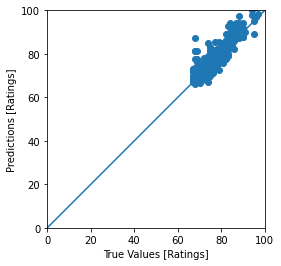

In [58]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Ratings]')
plt.ylabel('Predictions [Ratings]')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

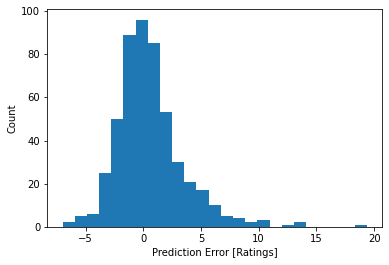

In [59]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Ratings]')
_ = plt.ylabel('Count')

In [60]:
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model\assets


In [61]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [62]:
pd.DataFrame(test_results, index=['Mean absolute error Ratings']).T

,Mean absolute error Ratings
minutes_model,2.488409
linear_model,1.771946
dnn_min_model,2.335012
dnn_model,2.086083
reloaded,2.086083


In [63]:
test_features

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,24,62,30,32,32.5,14.4,5.4,12.4,43.7,1.2,...,7.7,3.7,1.6,0.8,0.6,2.0,31.9,20.0,1.0,-1.1
1,23,66,42,24,24.5,9.5,3.5,8.5,41.4,1.3,...,2.4,3.4,1.3,0.8,0.2,1.8,19.3,3.0,0.0,1.7
2,26,55,37,18,15.8,6.3,2.2,4.8,46.8,0.9,...,1.8,0.7,0.8,0.4,0.4,1.4,11.1,0.0,0.0,-1.5
3,21,11,3,8,10.2,2.9,1.1,2.5,42.9,0.5,...,0.9,0.4,0.2,0.4,0.0,1.5,5.5,0.0,0.0,4.5
4,23,33,9,24,11.2,3.0,1.1,2.8,38.0,0.6,...,1.4,0.5,0.2,0.2,0.1,1.5,6.3,0.0,0.0,-1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,25,60,20,40,34.8,25.5,9.0,20.0,45.0,3.1,...,4.8,4.2,3.4,1.5,0.5,2.2,40.0,2.0,0.0,-3.2
503,22,5,2,3,8.2,2.0,0.6,2.4,25.0,0.6,...,1.2,0.6,0.6,0.4,0.0,0.8,4.9,0.0,0.0,-5.4
504,21,7,3,4,4.6,1.1,0.4,1.6,27.3,0.0,...,0.3,0.3,0.3,0.4,0.0,0.6,2.9,0.0,0.0,-1.4
505,19,24,11,13,27.8,22.5,8.8,15.0,58.3,0.3,...,6.3,2.1,2.5,0.7,0.4,1.8,33.8,2.0,0.0,2.6


In [64]:
test_labels

0      80.0
1      76.0
2      71.0
3      68.0
4      71.0
       ... 
502    85.0
503    68.0
504    70.0
505    86.0
506    67.0
Name: rankings, Length: 507, dtype: float64

In [65]:
test_predictions

array([ 77.16569 ,  76.081924,  72.9522  ,  69.5633  ,  69.91501 ,
        81.201485,  69.89227 ,  77.23767 ,  71.71879 ,  74.707855,
        74.70031 ,  68.383736,  69.26705 ,  68.31183 ,  71.51679 ,
        67.91161 ,  70.688705,  92.05207 ,  73.48623 ,  71.61577 ,
        82.41497 ,  72.655914,  72.06361 ,  95.22219 ,  68.42901 ,
        68.73889 ,  73.495155,  78.21997 ,  73.8409  ,  74.52703 ,
        68.74962 ,  82.22277 ,  74.059906,  88.48462 ,  75.000916,
        78.974174,  73.09169 ,  74.95829 ,  78.2615  ,  83.599236,
        74.655495,  94.19558 ,  81.49618 ,  72.57166 ,  88.76691 ,
        71.470085,  70.14601 ,  81.48417 ,  73.710625,  69.954796,
        72.03582 ,  74.42941 ,  83.50187 ,  85.87682 ,  72.612724,
        73.7524  ,  71.36092 ,  74.35085 ,  73.53243 ,  84.932144,
        80.11475 ,  81.18199 ,  70.74729 ,  72.334335,  73.78582 ,
        67.002495,  68.91542 ,  74.17352 ,  71.25355 ,  74.60282 ,
        73.68446 ,  72.49282 ,  87.206635,  79.152245,  86.331

In [66]:
testdf = pd.concat([test_features,test_labels], axis=1)

In [67]:
testdf

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,rankings
0,24,62,30,32,32.5,14.4,5.4,12.4,43.7,1.2,...,3.7,1.6,0.8,0.6,2.0,31.9,20.0,1.0,-1.1,80.0
1,23,66,42,24,24.5,9.5,3.5,8.5,41.4,1.3,...,3.4,1.3,0.8,0.2,1.8,19.3,3.0,0.0,1.7,76.0
2,26,55,37,18,15.8,6.3,2.2,4.8,46.8,0.9,...,0.7,0.8,0.4,0.4,1.4,11.1,0.0,0.0,-1.5,71.0
3,21,11,3,8,10.2,2.9,1.1,2.5,42.9,0.5,...,0.4,0.2,0.4,0.0,1.5,5.5,0.0,0.0,4.5,68.0
4,23,33,9,24,11.2,3.0,1.1,2.8,38.0,0.6,...,0.5,0.2,0.2,0.1,1.5,6.3,0.0,0.0,-1.7,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,25,60,20,40,34.8,25.5,9.0,20.0,45.0,3.1,...,4.2,3.4,1.5,0.5,2.2,40.0,2.0,0.0,-3.2,85.0
503,22,5,2,3,8.2,2.0,0.6,2.4,25.0,0.6,...,0.6,0.6,0.4,0.0,0.8,4.9,0.0,0.0,-5.4,68.0
504,21,7,3,4,4.6,1.1,0.4,1.6,27.3,0.0,...,0.3,0.3,0.4,0.0,0.6,2.9,0.0,0.0,-1.4,70.0
505,19,24,11,13,27.8,22.5,8.8,15.0,58.3,0.3,...,2.1,2.5,0.7,0.4,1.8,33.8,2.0,0.0,2.6,86.0


In [68]:
test_dataset_all.drop(test_features, axis=1, inplace=True)

In [69]:
test_dataset_all.drop(['Unnamed: 0', 'rankings'], axis=1)

,PLAYER,TEAM,SEASON
0,Aaron Gordon,ORL,2019-20
1,Aaron Holiday,IND,2019-20
2,Abdel Nader,OKC,2019-20
3,Adam Mokoka,CHI,2019-20
4,Admiral Schofield,WAS,2019-20
...,...,...,...
502,Zach LaVine,CHI,2019-20
503,Zach Norvell Jr.,GSW,2019-20
504,Zhaire Smith,PHI,2019-20
505,Zion Williamson,NOP,2019-20


In [70]:
test_dataset_all

,Unnamed: 0,PLAYER,TEAM,SEASON,rankings
0,0,Aaron Gordon,ORL,2019-20,80.0
1,1,Aaron Holiday,IND,2019-20,76.0
2,2,Abdel Nader,OKC,2019-20,71.0
3,3,Adam Mokoka,CHI,2019-20,68.0
4,4,Admiral Schofield,WAS,2019-20,71.0
...,...,...,...,...,...
502,623,Zach LaVine,CHI,2019-20,85.0
503,624,Zach Norvell Jr.,GSW,2019-20,68.0
504,628,Zhaire Smith,PHI,2019-20,70.0
505,629,Zion Williamson,NOP,2019-20,86.0


In [71]:
testdf = pd.DataFrame.merge(testdf,test_dataset_all,left_index=True, right_index=True)

In [73]:
testdf

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,FP,DD2,TD3,+/-,rankings_x,Unnamed: 0,PLAYER,TEAM,SEASON,rankings_y
0,24,62,30,32,32.5,14.4,5.4,12.4,43.7,1.2,...,31.9,20.0,1.0,-1.1,80.0,0,Aaron Gordon,ORL,2019-20,80.0
1,23,66,42,24,24.5,9.5,3.5,8.5,41.4,1.3,...,19.3,3.0,0.0,1.7,76.0,1,Aaron Holiday,IND,2019-20,76.0
2,26,55,37,18,15.8,6.3,2.2,4.8,46.8,0.9,...,11.1,0.0,0.0,-1.5,71.0,2,Abdel Nader,OKC,2019-20,71.0
3,21,11,3,8,10.2,2.9,1.1,2.5,42.9,0.5,...,5.5,0.0,0.0,4.5,68.0,3,Adam Mokoka,CHI,2019-20,68.0
4,23,33,9,24,11.2,3.0,1.1,2.8,38.0,0.6,...,6.3,0.0,0.0,-1.7,71.0,4,Admiral Schofield,WAS,2019-20,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,25,60,20,40,34.8,25.5,9.0,20.0,45.0,3.1,...,40.0,2.0,0.0,-3.2,85.0,623,Zach LaVine,CHI,2019-20,85.0
503,22,5,2,3,8.2,2.0,0.6,2.4,25.0,0.6,...,4.9,0.0,0.0,-5.4,68.0,624,Zach Norvell Jr.,GSW,2019-20,68.0
504,21,7,3,4,4.6,1.1,0.4,1.6,27.3,0.0,...,2.9,0.0,0.0,-1.4,70.0,628,Zhaire Smith,PHI,2019-20,70.0
505,19,24,11,13,27.8,22.5,8.8,15.0,58.3,0.3,...,33.8,2.0,0.0,2.6,86.0,629,Zion Williamson,NOP,2019-20,86.0


In [74]:
testdf.reset_index(drop=True,inplace=True)

In [75]:
testdf

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,FP,DD2,TD3,+/-,rankings_x,Unnamed: 0,PLAYER,TEAM,SEASON,rankings_y
0,24,62,30,32,32.5,14.4,5.4,12.4,43.7,1.2,...,31.9,20.0,1.0,-1.1,80.0,0,Aaron Gordon,ORL,2019-20,80.0
1,23,66,42,24,24.5,9.5,3.5,8.5,41.4,1.3,...,19.3,3.0,0.0,1.7,76.0,1,Aaron Holiday,IND,2019-20,76.0
2,26,55,37,18,15.8,6.3,2.2,4.8,46.8,0.9,...,11.1,0.0,0.0,-1.5,71.0,2,Abdel Nader,OKC,2019-20,71.0
3,21,11,3,8,10.2,2.9,1.1,2.5,42.9,0.5,...,5.5,0.0,0.0,4.5,68.0,3,Adam Mokoka,CHI,2019-20,68.0
4,23,33,9,24,11.2,3.0,1.1,2.8,38.0,0.6,...,6.3,0.0,0.0,-1.7,71.0,4,Admiral Schofield,WAS,2019-20,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,25,60,20,40,34.8,25.5,9.0,20.0,45.0,3.1,...,40.0,2.0,0.0,-3.2,85.0,623,Zach LaVine,CHI,2019-20,85.0
503,22,5,2,3,8.2,2.0,0.6,2.4,25.0,0.6,...,4.9,0.0,0.0,-5.4,68.0,624,Zach Norvell Jr.,GSW,2019-20,68.0
504,21,7,3,4,4.6,1.1,0.4,1.6,27.3,0.0,...,2.9,0.0,0.0,-1.4,70.0,628,Zhaire Smith,PHI,2019-20,70.0
505,19,24,11,13,27.8,22.5,8.8,15.0,58.3,0.3,...,33.8,2.0,0.0,2.6,86.0,629,Zion Williamson,NOP,2019-20,86.0


In [76]:
preddf = pd.DataFrame(test_predictions)

In [77]:
preddf

,0
0,77.165688
1,76.081924
2,72.952202
3,69.563301
4,69.915009
...,...
502,88.360497
503,73.266960
504,68.365089
505,91.466675


In [78]:
nbatestpred = pd.DataFrame.merge(testdf,preddf, left_index=True, right_index=True)

In [79]:
nbatestpred

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,DD2,TD3,+/-,rankings_x,Unnamed: 0,PLAYER,TEAM,SEASON,rankings_y,0
0,24,62,30,32,32.5,14.4,5.4,12.4,43.7,1.2,...,20.0,1.0,-1.1,80.0,0,Aaron Gordon,ORL,2019-20,80.0,77.165688
1,23,66,42,24,24.5,9.5,3.5,8.5,41.4,1.3,...,3.0,0.0,1.7,76.0,1,Aaron Holiday,IND,2019-20,76.0,76.081924
2,26,55,37,18,15.8,6.3,2.2,4.8,46.8,0.9,...,0.0,0.0,-1.5,71.0,2,Abdel Nader,OKC,2019-20,71.0,72.952202
3,21,11,3,8,10.2,2.9,1.1,2.5,42.9,0.5,...,0.0,0.0,4.5,68.0,3,Adam Mokoka,CHI,2019-20,68.0,69.563301
4,23,33,9,24,11.2,3.0,1.1,2.8,38.0,0.6,...,0.0,0.0,-1.7,71.0,4,Admiral Schofield,WAS,2019-20,71.0,69.915009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,25,60,20,40,34.8,25.5,9.0,20.0,45.0,3.1,...,2.0,0.0,-3.2,85.0,623,Zach LaVine,CHI,2019-20,85.0,88.360497
503,22,5,2,3,8.2,2.0,0.6,2.4,25.0,0.6,...,0.0,0.0,-5.4,68.0,624,Zach Norvell Jr.,GSW,2019-20,68.0,73.266960
504,21,7,3,4,4.6,1.1,0.4,1.6,27.3,0.0,...,0.0,0.0,-1.4,70.0,628,Zhaire Smith,PHI,2019-20,70.0,68.365089
505,19,24,11,13,27.8,22.5,8.8,15.0,58.3,0.3,...,2.0,0.0,2.6,86.0,629,Zion Williamson,NOP,2019-20,86.0,91.466675


In [80]:
nbatestpred.drop(['rankings_x', 'Unnamed: 0'], axis=1, inplace=True)

In [81]:
nbatestpred.rename(columns={'rankings_y': 'rankings'}, inplace=True)

In [82]:
nbatestpred

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,PF,FP,DD2,TD3,+/-,PLAYER,TEAM,SEASON,rankings,0
0,24,62,30,32,32.5,14.4,5.4,12.4,43.7,1.2,...,2.0,31.9,20.0,1.0,-1.1,Aaron Gordon,ORL,2019-20,80.0,77.165688
1,23,66,42,24,24.5,9.5,3.5,8.5,41.4,1.3,...,1.8,19.3,3.0,0.0,1.7,Aaron Holiday,IND,2019-20,76.0,76.081924
2,26,55,37,18,15.8,6.3,2.2,4.8,46.8,0.9,...,1.4,11.1,0.0,0.0,-1.5,Abdel Nader,OKC,2019-20,71.0,72.952202
3,21,11,3,8,10.2,2.9,1.1,2.5,42.9,0.5,...,1.5,5.5,0.0,0.0,4.5,Adam Mokoka,CHI,2019-20,68.0,69.563301
4,23,33,9,24,11.2,3.0,1.1,2.8,38.0,0.6,...,1.5,6.3,0.0,0.0,-1.7,Admiral Schofield,WAS,2019-20,71.0,69.915009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,25,60,20,40,34.8,25.5,9.0,20.0,45.0,3.1,...,2.2,40.0,2.0,0.0,-3.2,Zach LaVine,CHI,2019-20,85.0,88.360497
503,22,5,2,3,8.2,2.0,0.6,2.4,25.0,0.6,...,0.8,4.9,0.0,0.0,-5.4,Zach Norvell Jr.,GSW,2019-20,68.0,73.266960
504,21,7,3,4,4.6,1.1,0.4,1.6,27.3,0.0,...,0.6,2.9,0.0,0.0,-1.4,Zhaire Smith,PHI,2019-20,70.0,68.365089
505,19,24,11,13,27.8,22.5,8.8,15.0,58.3,0.3,...,1.8,33.8,2.0,0.0,2.6,Zion Williamson,NOP,2019-20,86.0,91.466675


In [83]:
nbatestpred.to_csv('NBATestPred.csv')